## Final Task:
This is your final evaluation for the project. As decided, we will be predicting images of people into three classes: `without_mask`, `mask_weared_incorrect` and `with_mask`. 

In [1]:
import tensorflow as tf

### Loading the dataset
Make a copy of the dataset given to you in your Google Drive (keep it outside, don't put it in any folder to avoid inconvenience). Ensure it is named as `Mask_Dataset` or change the path (the variable `data_dir`) accordingly.

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')
!unzip drive/MyDrive/Data/Mask_Dataset-20220712T181941Z-001

In [3]:
import pathlib

path='/content/Mask_Dataset/'
data_dir = pathlib.Path(path)

### Know the Dataset
Most of the code is written for you as you aren't used to these libraries. You are to go through the documentation for your benefit.

In [4]:
# Print image count
image_count = len(list(data_dir.glob('*/*.png')))
print(image_count)

8982


In [5]:
# Print Output Labels
import os
output_classes = os.listdir(data_dir)
print(output_classes)

['without_mask', 'with_mask', 'mask_weared_incorrect']


[2994, 2994, 2994]


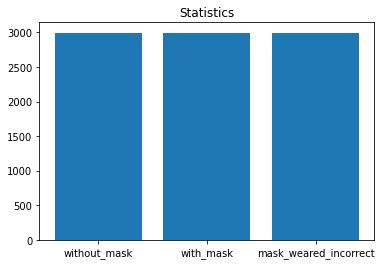

In [6]:
# Plot count of each ouput label
import matplotlib.pyplot as plt

count=[]
for label in output_classes:
  this_path=path+label
  dir=pathlib.Path(this_path)
  im_count=os.listdir(dir)
  count.append(len(im_count))

print(count)

plt.bar(output_classes,count)
plt.title("Statistics")
plt.show()

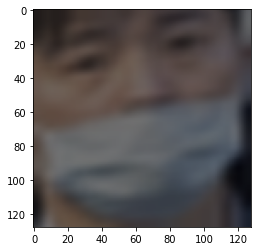

In [7]:
# Check some sample images (Use of cv2)
import cv2
from google.colab.patches import cv2_imshow

# Your code
DataDirectory="/content/Mask_Dataset/"
Classes =["mask_weared_incorrect","with_mask","without_mask"]
for category in Classes:
   path=os.path.join(DataDirectory,category)
   for img in os.listdir(path):
     img_array = cv2.imread(os.path.join(path,img))
     plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB))
     plt.show()
     break
   break  

In [8]:
# Check shape of the images in your dataset. This will be helpful while specifying input_shape in your Transfer Learning Model
img_array.shape

(128, 128, 3)

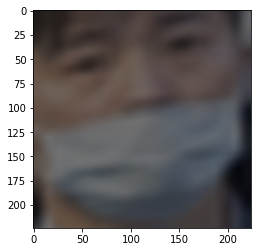

In [9]:
# Check if all the images have same shape, else you need to resize them to some common size
# The code provided as it is above in the template will help 
img_size= 224
new_array = cv2.resize(img_array,(img_size,img_size))
plt.imshow(cv2.cvtColor(new_array, cv2.COLOR_BGR2RGB))

In [10]:
# If the shape is variable, reshape to a common size 
# If it is same, prove it
s=new_array.shape
s

(224, 224, 3)

In [11]:
# Anything else you want to plot/experiment

### Model Definition
Choose a model for Transfer Learning (You may also experment with multiple models and keep all of them in this notebook)

In [12]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,MaxPooling2D
from tensorflow.keras.models import Model
from tensorflow.keras import layers
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from keras.applications.vgg19 import VGG19
from keras.applications.vgg19 import preprocess_input
from keras import Sequential
from keras.layers import Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import os

In [13]:
from keras.applications.resnet import ResNet50
from tensorflow.keras.optimizers import Adam
# Choose and define base model
model=ResNet50(include_top=False,weights='imagenet',input_shape=s)



94781440/94765736 [==============================] - 1s 0us/step


In [ ]:
# Print base model summary and have a look at the layers
model.summary()

In [15]:
# As we're using Transfer Learning, you do not need to train all the layers. Freeze all of the layers or train some layers (experiment)
for layer in model.layers:
    layer.trainable = False

In [16]:
# Append Fully connected/custom Conv2D/Dropout/MaxPooling layers to the base model
from keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D, AveragePooling2D
av1=GlobalAveragePooling2D()(model.output)
fc1=Dense(256,activation='relu')(av1)
d1=Dropout(0.5)(fc1)
fc2=Dense(3,activation='softmax')(d1)






In [17]:
# Add the final output layer

new_model=Model(inputs=model.input,outputs=fc2)


In [ ]:
# Print your model's summary

new_model.summary()

In [19]:
# Compile you model (set the parameters like loss/optimizers/metrics)
adam=Adam(lr=0.00003)
new_model.compile(optimizer='adam',loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


### Data Augmentation and Pre-processing
Augment the data. You may also try dyanamic augmentation using [`tf.keras.preprocessing.image.ImageDataGenerator `](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator).   
You may use [`tf.keras.applications.vgg16.preprocess_input`](https://www.tensorflow.org/api_docs/python/tf/keras/applications/vgg16/preprocess_input)(or some other base model's utility) for pre-processing (can also be passed as a parameter to `ImageDataGenerator`)

In [20]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
from keras.applications.vgg16 import preprocess_input # Change according to your base model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Your code 
INIT_LR = 1e-4
EPOCHS = 20
BS = 32
train_datagen = ImageDataGenerator(
        rescale=1 / 255.0,
        rotation_range=20,
        zoom_range=0.05,
        width_shift_range=0.05,
        height_shift_range=0.05,
        shear_range=0.05,
        horizontal_flip=True,
        fill_mode="nearest",
        validation_split=0.20)

test_datagen = ImageDataGenerator(rescale=1 / 255.0)

In [22]:
# Anything else you wish to try

### Training and Validation Dataset  
Split the dataset into training and validation (We'll be looking for your validation accuracy, assume we are using complete dataset for now). 

Hint: `flow_from_directory` used with `ImageDataGenerator` will simplify things for you.

In [23]:
import glob
import  numpy as np
msi = glob.glob('/content/Mask_Dataset/mask_weared_incorrect/*.*')
wm = glob.glob('/content/Mask_Dataset/with_mask/*.*')
wom = glob.glob('/content/Mask_Dataset/without_mask/*.*')


data = []
labels = []

for i in msi:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= s)
    image=np.array(image)
    data.append(image)
    labels.append(0)
for i in wm:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= s)
    image=np.array(image)
    data.append(image)
    labels.append(1)
for i in wom:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= s)
    image=np.array(image)
    data.append(image)
    labels.append(2)

data = np.array(data)
labels = np.array(labels)

from sklearn.model_selection import train_test_split
X_train, X_test, ytrain, ytest = train_test_split(data, labels, test_size=0.2,
                                                random_state=42)


### Training  
Train your model for some epochs and plot the graph. Try and save your best model. Experiment with the parameters of `model.fit`

In [24]:
hist=new_model.fit(X_train,ytrain,epochs=5,validation_split=0.20)


Epoch 1/5


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


180/180 [==============================] - 38s 138ms/step - loss: 0.2030 - accuracy: 0.9351 - val_loss: 0.0648 - val_accuracy: 0.9756
Epoch 2/5
180/180 [==============================] - 21s 115ms/step - loss: 0.0895 - accuracy: 0.9671 - val_loss: 0.0708 - val_accuracy: 0.9743
Epoch 3/5
180/180 [==============================] - 21s 116ms/step - loss: 0.0645 - accuracy: 0.9779 - val_loss: 0.0404 - val_accuracy: 0.9826
Epoch 4/5
180/180 [==============================] - 21s 118ms/step - loss: 0.0340 - accuracy: 0.9873 - val_loss: 0.0398 - val_accuracy: 0.9847
Epoch 5/5
180/180 [==============================] - 22s 121ms/step - loss: 0.0239 - accuracy: 0.9925 - val_loss: 0.0536 - val_accuracy: 0.9833


In [27]:
from keras.callbacks import ModelCheckpoint
# ModelCheckpoint is helpful to save the model giving best results (brownie points)
tf.keras.callbacks.ModelCheckpoint(
    DataDirectory,
    monitor="val_loss",
    verbose=0,
    save_best_only=False,
    save_weights_only=False,
    mode="auto",
    save_freq="epoch",
    options=None,
    initial_value_threshold=None,
  
)

### Evaluate the performance

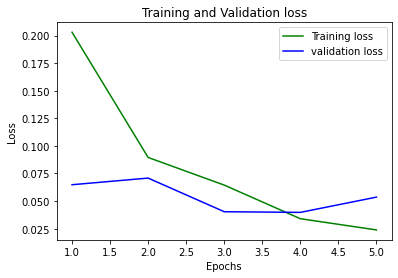

In [28]:
# Plot training & validation loss/accuracy values
loss_train = hist.history['loss']
loss_val =hist.history['val_loss']
epochs = range(1,6)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [32]:
from types import new_class
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np



new_model.fit(X_train,ytrain,epochs=5,validation_split=0.20)

print(classification_report(ytest, np.asarray(new_model.predict(X_test))))


Epoch 1/5
180/180 [==============================] - 22s 120ms/step - loss: 0.0353 - accuracy: 0.9878 - val_loss: 0.1011 - val_accuracy: 0.9791
Epoch 2/5
180/180 [==============================] - 22s 123ms/step - loss: 0.0259 - accuracy: 0.9901 - val_loss: 0.0897 - val_accuracy: 0.9812
Epoch 3/5
180/180 [==============================] - 23s 127ms/step - loss: 0.0116 - accuracy: 0.9965 - val_loss: 0.0420 - val_accuracy: 0.9882
Epoch 4/5
180/180 [==============================] - 22s 123ms/step - loss: 0.0088 - accuracy: 0.9965 - val_loss: 0.0387 - val_accuracy: 0.9889
Epoch 5/5
180/180 [==============================] - 22s 122ms/step - loss: 0.0036 - accuracy: 0.9984 - val_loss: 0.0533 - val_accuracy: 0.9868


ValueError: ignored

In [ ]:
# Use the classification report to print precision, recall, f1-score for the three classes(optional, brownie points)
